# Analysis and Visualization of IPL Data


Submitted by: 


*   Name: Kabir Chhabra
*   Roll no.: 101903328
* Batch : COE13



The dashboard will run at http://127.0.0.1:8040/ or at the end of file

In [1]:
#Importing the required files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file
ipl_df = pd.read_csv('https://raw.githubusercontent.com/kabirchhabra/IPLDataAnalysis/main/matches.csv')

In [3]:
#Viewing first 5 records of the dataframe
ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#Printing dimensions of the dataframe
ipl_df.shape

(756, 18)

In [5]:
#Viewing all columns and deleting unecessary(if any)
ipl_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

---
---

**Data cleaning**

In [6]:
#Droping the umpire column 
ipl_df.drop(columns=['umpire1', 'umpire2','umpire3'],inplace=True)
ipl_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [7]:
#Details of the seasons year for which we have the information
# ipl_df.Season
ipl_df.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [8]:
#Details of the teams
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Since in the teams we have some conflicts:


*   Rising Pune Supergiant and Rising Pune Supergiants are same.
*   Also the team Delhi Daredevils, now name has been changed to Delhi Capitals,  Kings XI Punjab has been changed to Punjab Kings and Pune Warriors to Rising Pune Supergiant



The names of teams appear in the column that we need to change: Team 1, Team 2, Toss_winner and winner 

In [9]:
ipl_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals', 'Kings XI Punjab':'Punjab Kings', 'Pune Warriors':'Rising Pune Supergiant'}, inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals', 'Kings XI Punjab':'Punjab Kings', 'Pune Warriors':'Rising Pune Supergiant'}, inplace=True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals', 'Kings XI Punjab':'Punjab Kings', 'Pune Warriors':'Rising Pune Supergiant'}, inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals', 'Kings XI Punjab':'Punjab Kings', 'Pune Warriors':'Rising Pune Supergiant'}, inplace=True)

ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Punjab Kings',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)



---



---



**Check for NULL values**

In [10]:
ipl_df.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

* We have total of 15 null values which we have to clean to avoid inconsistency in our results




In [11]:
nullVal = ipl_df[ipl_df.isna().any(axis=1)] #pd.isna() gives a boolean expression if a value is n/a or not and pd.any() also goves a boolean expression of any element to be true over an axis
nullVal                                     # axis=1: iterate over columns and 0: for index/rows/


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Punjab Kings,Punjab Kings,field,normal,0,Punjab Kings,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium


* Since in these null values, the values are being missing for the column City, Winner, Player of the match

* So, first let's check for the city, as mostly the value at index 460-470 the city value is missing

In [12]:
ipl_df.loc[460:480]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
460,461,IPL-2014,Abu Dhabi,18-04-2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
463,464,IPL-2014,Sharjah,20-04-2014,Rajasthan Royals,Punjab Kings,Punjab Kings,field,normal,0,Punjab Kings,0,7,GJ Maxwell,Sharjah Cricket Stadium
464,465,IPL-2014,Abu Dhabi,21-04-2014,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium
465,466,IPL-2014,Sharjah,22-04-2014,Punjab Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Punjab Kings,72,0,GJ Maxwell,Sharjah Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
467,468,IPL-2014,Sharjah,24-04-2014,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium


* As this season was hosted in UAE, since the near indexes are Abu Dhabi and Sharjah, so lets replace the null values with Dubai

In [13]:
ipl_df.loc[[461,462,466,468,469,474,476],'city'] = 'Dubai'
ipl_df.loc[460:480]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
460,461,IPL-2014,Abu Dhabi,18-04-2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium
461,462,IPL-2014,Dubai,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,Dubai,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
463,464,IPL-2014,Sharjah,20-04-2014,Rajasthan Royals,Punjab Kings,Punjab Kings,field,normal,0,Punjab Kings,0,7,GJ Maxwell,Sharjah Cricket Stadium
464,465,IPL-2014,Abu Dhabi,21-04-2014,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium
465,466,IPL-2014,Sharjah,22-04-2014,Punjab Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Punjab Kings,72,0,GJ Maxwell,Sharjah Cricket Stadium
466,467,IPL-2014,Dubai,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
467,468,IPL-2014,Sharjah,24-04-2014,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium
468,469,IPL-2014,Dubai,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,Dubai,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium


In [14]:
#Lets check again for null values in city field
ipl_df.city.isnull().sum()

0



---



---



**Data Analysis** 




In [15]:
ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Punjab Kings,Punjab Kings,field,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


**Lets find out the number of matches played in every venue and visualizing it.**

In [16]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [17]:
#Calculated the total matches played in different venues by grouping the city
cities = ipl_df.groupby('city')[['id']].count()
cities

,id
city,
Abu Dhabi,7
Ahmedabad,12
Bangalore,66
Bengaluru,14
Bloemfontein,2
Cape Town,7
Centurion,12
Chandigarh,46
Chennai,57


In [18]:
#Renaming the id column to matches played
cities.rename(columns={'id':'matches played'},inplace=True)
cities = cities.reset_index()  #It resets the index of the dataframe and use the default
cities

,city,matches played
0,Abu Dhabi,7
1,Ahmedabad,12
2,Bangalore,66
3,Bengaluru,14
4,Bloemfontein,2
5,Cape Town,7
6,Centurion,12
7,Chandigarh,46
8,Chennai,57
9,Cuttack,7



* **Bar plot representing the number of matches played on different venues**




Text(0.5, 1.0, 'Number Of Matches Played In Each City')

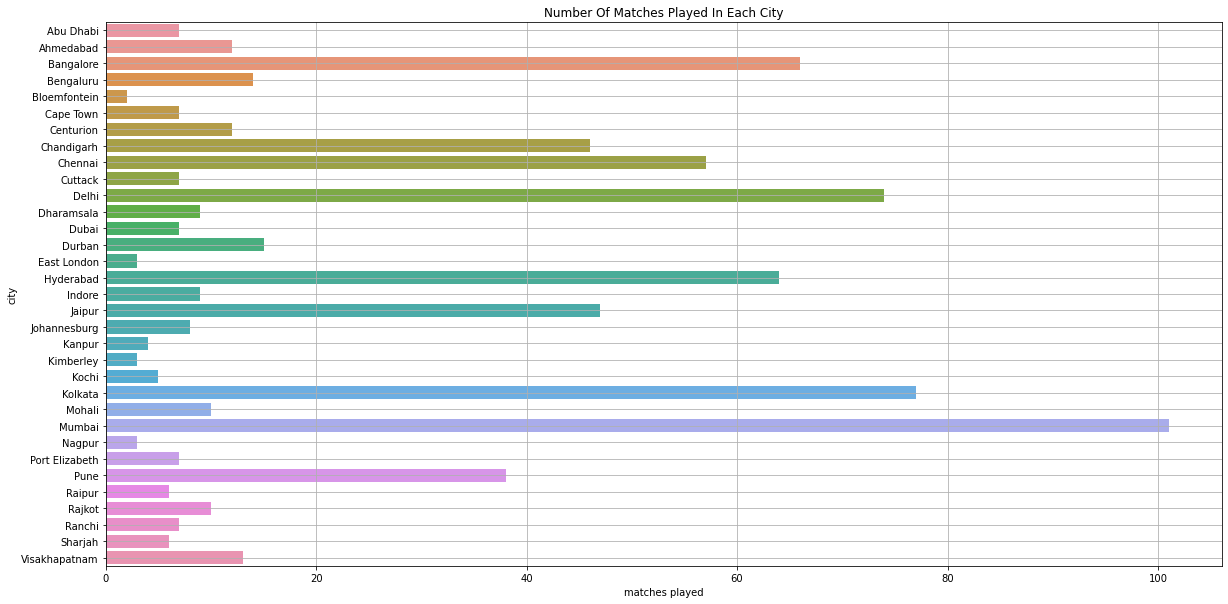

In [19]:
plt.figure(figsize=(20,10))

sns.barplot(x='matches played',y='city',data=cities);

plt.grid()
plt.title('Number Of Matches Played In Each City')

From this bar plot we can visualise that most of the matches have been played in Mumbai followed by Kolkata and Delhi



---



---



**Lets see and visualize most number of wins by a team.**

In [20]:
ipl_df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Punjab Kings',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', nan], dtype=object)

In [21]:
#Calculate total number of wins by each team so far
winner_df = ipl_df.groupby('winner')[['id']].count()
winner_df = winner_df.sort_values('id', ascending=False)
# winner_df

winner_df = winner_df.reset_index()
winner_df.rename(columns={'id':'Wins', 'winner': 'Team'},inplace=True)
winner_df

,Team,Wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Punjab Kings,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


* Mumbai Indians have won most times, now let's also represent it in a bar graph

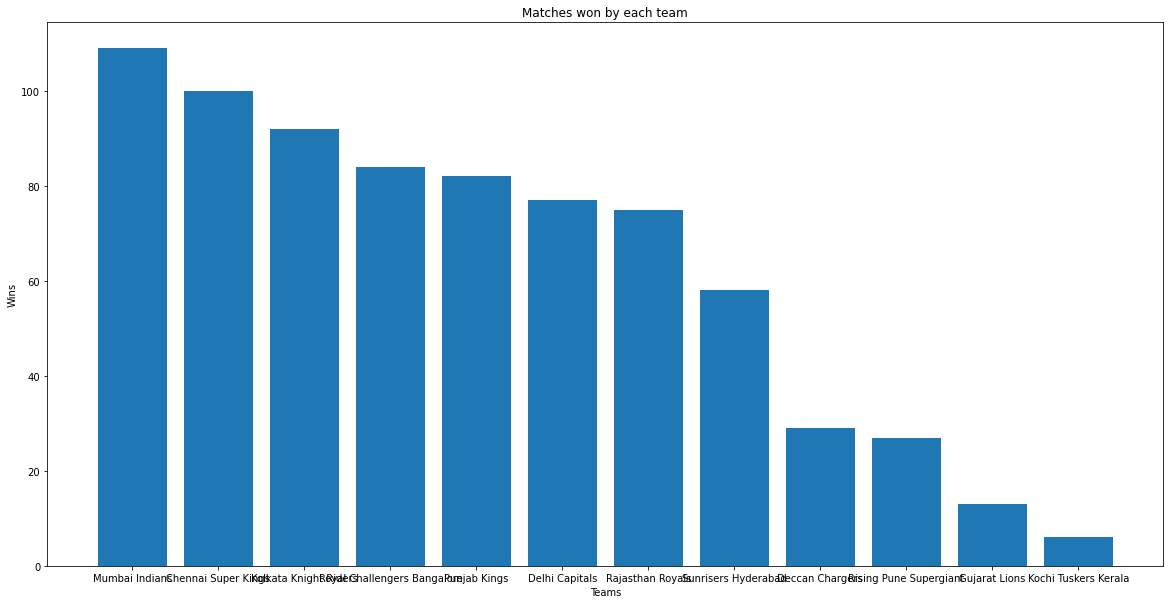

In [22]:
plt.figure(figsize=(20,10))
plt.bar(winner_df['Team'], winner_df['Wins'])

plt.xlabel('Teams')
plt.ylabel('Wins')
plt.title('Matches won by each team')

plt.show()

**Let's make this bar graph more attractive**

<BarContainer object of 12 artists>

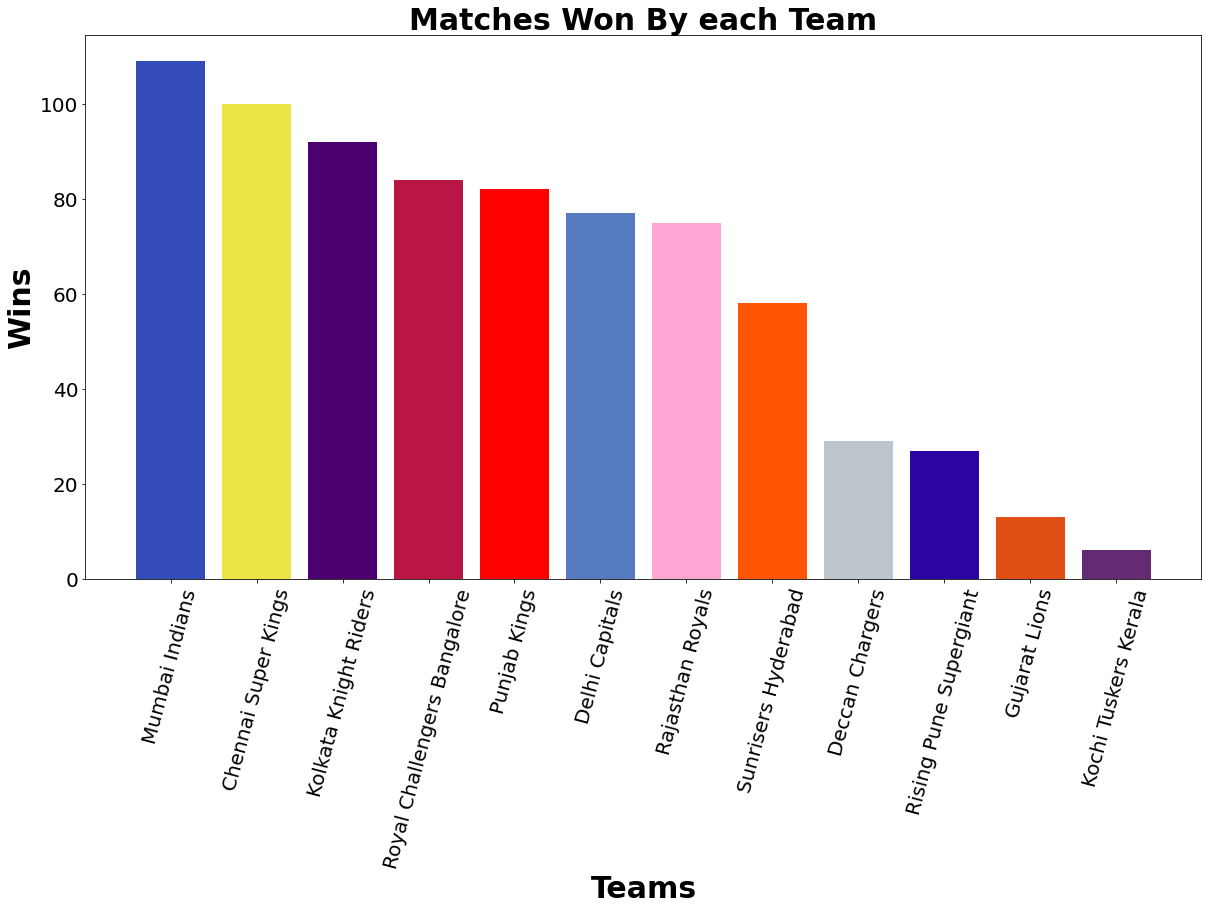

In [23]:
plt.figure(figsize=(20,10))
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Wins',fontweight='bold',fontsize=30)
plt.title("Matches Won By each Team", fontweight='bold',fontsize=30)
plt.tick_params(labelsize=20)
plt.xticks(rotation=75)

colours = ['#344CB7', '#EBE645', '#4C0070', '#B91646', '#FF0000', '#577BC1', '#FFA6D5', '#FF5403', '#BCC6CC','#2C04A2','#E04F16','#632B72' ]
plt.bar(winner_df['Team'],winner_df['Wins'],color=colours)


* From this graph we can conclude that Mumbai Indians is the father of all the teams as it has won the maximum times



---



---



**Now let's represent in which season the maximum matches have been played**

In [24]:
ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Punjab Kings,Punjab Kings,field,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [25]:
season_df = ipl_df.groupby('Season')[['id']].count()
# season_df

season_df = season_df.sort_values('id', ascending=False)
season_df.rename(columns={'Season':'Year', 'id': 'Matches Played'},inplace=True)
season_df = season_df.reset_index()

season_df

,Season,Matches Played
0,IPL-2013,76
1,IPL-2012,74
2,IPL-2011,73
3,IPL-2010,60
4,IPL-2014,60
5,IPL-2016,60
6,IPL-2018,60
7,IPL-2019,60
8,IPL-2015,59
9,IPL-2017,59


* Now let's also represent this data into a pie graph

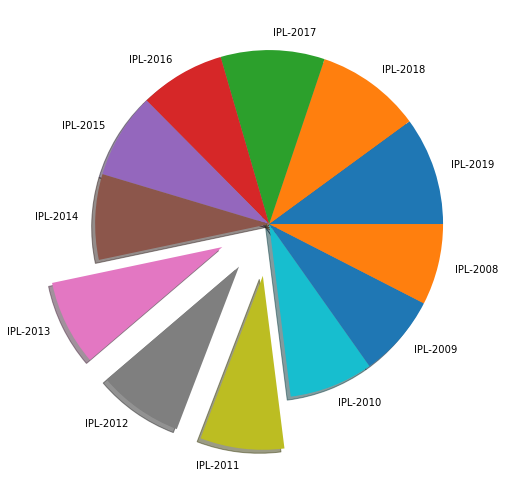

In [26]:
plt.figure(figsize=(12,8))
mylabels = ['IPL-' + str(i) for i in range(2019,2007,-1)]
myexplode = [0 if (i!=2013 and i!=2012 and i!=2011) else 0.3 for i in range(2019,2007,-1)]

plt.pie(season_df['Matches Played'], labels=mylabels,explode=myexplode, shadow=True)
plt.show()

* This pie graph tells the 3 season years by exploding them in which maximum matches were played

* Maximum matches were played in 2013 followed by 2012 and 2011



---



---




** Now let's visualize the toss decision **



* **The most preferred decision among bat/field**
* **And whether that decision was right or wrong**

In [27]:
decision_df = ipl_df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()
decision_df.rename(columns={'id':'Total', 'toss_decision':'Decision'},inplace=True)
decision_df

,Decision,Total
0,bat,293
1,field,463


* decision_df dataframe tells us about the total number of times bat was chosen and total number of times field was chosen 

In [28]:
print(f"The most preferred decision has been '{'Bat' if decision_df['Total'][0] > decision_df['Total'][1] else 'Field'}'")

The most preferred decision has been 'Field'


In [29]:
#Now lets find out the whether the decision taken was beneficial or not
toss_bat_df = ipl_df.loc[(ipl_df['toss_winner']==ipl_df['winner']) & (ipl_df['toss_decision'] == 'bat'), ['id','winner','toss_decision']]
toss_bat_df

,id,winner,toss_decision
4,5,Royal Challengers Bangalore,bat
14,15,Delhi Capitals,bat
20,21,Sunrisers Hyderabad,bat
50,51,Delhi Capitals,bat
54,55,Royal Challengers Bangalore,bat
...,...,...,...
713,11309,Chennai Super Kings,bat
729,11325,Mumbai Indians,bat
741,11337,Delhi Capitals,bat
746,11342,Mumbai Indians,bat


In [30]:
toss_field_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision']=='field'),['id','winner','toss_decision']]
toss_field_df

,id,winner,toss_decision
1,2,Rising Pune Supergiant,field
2,3,Kolkata Knight Riders,field
3,4,Punjab Kings,field
5,6,Sunrisers Hyderabad,field
6,7,Mumbai Indians,field
...,...,...,...
749,11345,Royal Challengers Bangalore,field
750,11346,Punjab Kings,field
751,11347,Mumbai Indians,field
753,11413,Delhi Capitals,field


In [31]:
toss_df = pd.concat([toss_bat_df,toss_field_df])
toss_df

,id,winner,toss_decision
4,5,Royal Challengers Bangalore,bat
14,15,Delhi Capitals,bat
20,21,Sunrisers Hyderabad,bat
50,51,Delhi Capitals,bat
54,55,Royal Challengers Bangalore,bat
...,...,...,...
749,11345,Royal Challengers Bangalore,field
750,11346,Punjab Kings,field
751,11347,Mumbai Indians,field
753,11413,Delhi Capitals,field


In [32]:
toss_df = toss_df.groupby('toss_decision')[['id']].count()
toss_df

,id
toss_decision,
bat,134
field,259


In [33]:
toss_df = toss_df.reset_index()
toss_df.rename(columns={'toss_decision':'Decision', 'id':'Total'},inplace=True)
toss_df

,Decision,Total
0,bat,134
1,field,259


In [34]:
decision_df

,Decision,Total
0,bat,293
1,field,463


* From these two dataframes we can see that when bat was chosen after winning toss it resulted beneficial only 134 times out of 293 times

* Similarly for field it was beneficial was 259 times out of 463 times

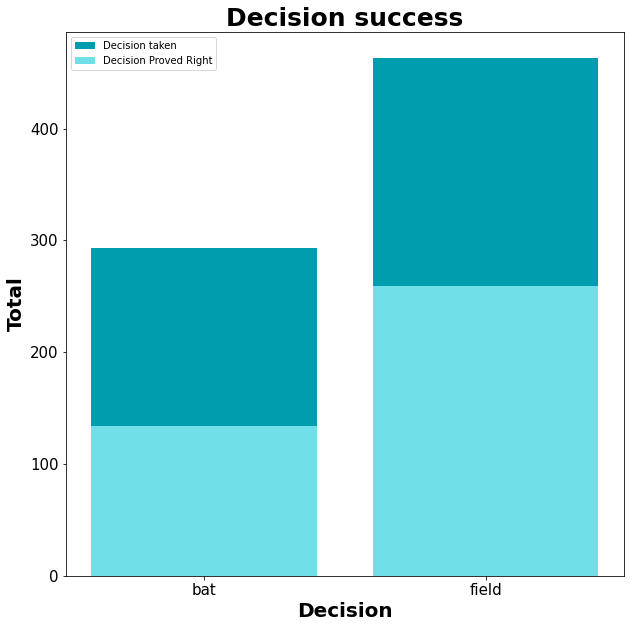

In [35]:
plt.figure(figsize=(10,10))
plt.bar(decision_df['Decision'], decision_df['Total'], color=['#009DAE','#009DAE'])
plt.bar(toss_df['Decision'], toss_df['Total'], color=['#71DFE7','#71DFE7'])

plt.legend(['Decision taken', 'Decision Proved Right'])
plt.title('Decision success', fontweight='bold',fontsize=25)
plt.xlabel('Decision', fontweight='bold', fontsize=20)
plt.ylabel('Total', fontweight='bold', fontsize=20)
plt.tick_params(labelsize=15)



---



---



In [36]:
#pip install jupyter-dash -q

In [37]:
#pip install dash-cytoscape -q

In [38]:
#pip install dash-bootstrap-components

Note: you may need to restart the kernel to use updated packages.


In [57]:
from jupyter_dash import JupyterDash 
from dash.dependencies import Output, Input
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as py
import math
import dash_bootstrap_components as dbc
from dash import no_update
from dash import html
from dash import dcc


df = pd.read_csv("https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Callbacks/Basic%20Callback/Mutual-Funds.csv")



external_stylesheets = [dbc.themes.PULSE]
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dbc.Row(dbc.Col(
        html.H2("IPL DataSet Analysis"), style={'textAlign': 'center', 'margin':15}
    )),
    html.Br(),
    html.Div([dcc.Dropdown(
        id='demo-dropdown',
        options=[
            {'label': 'Which venue had maxmimum number of matches ?', 'value': 'venue'},
            {'label': 'Which team had won the maximum number of titles ?', 'value': 'team'},
            {'label': 'Which season had maximum number of matches ?', 'value': 'season'},
            {'label' : 'Was the decision choosen at time of toss was beneficial ? ', 'value':'toss'}
        ],
        placeholder="Select an option"
    )]),
    html.Div([dcc.Graph(id="graph", figure={})]),
    html.H4(["Reference from this Graph: "], style={"margin-bottom":20}),
    html.Div(id='dd-output-container'),
    html.Br(),
    html.Br(),
    html.H6(["Made by: Kabir Chhabra"],style={"opacity":0.2, "margin-top":15, "text-align":'center'})
],style={'margin':30})


@app.callback(
    Output('graph', 'figure'),
    Input('demo-dropdown', 'value')
)
def update_output(value):
    if(value=="venue"):
        return px.bar(cities,x='matches played', y='city')
    elif(value=="team"):
        return px.bar(winner_df, x=winner_df['Team'],y=winner_df['Wins'])
    elif(value=="season"):
        return px.pie(season_df, values='Matches Played', names='Season')
    elif(value=="toss"):
        return py.Figure(data=[py.Bar(name = 'Total times',x = decision_df['Decision'],y = decision_df['Total']),
                               py.Bar(name = 'Total win', x = toss_df['Decision'],y = toss_df['Total'])
                              ])
    else:
        return px.bar(cities,x='matches played', y='city')
        

@app.callback(
    Output('dd-output-container', 'children'),
    Input('demo-dropdown','value')
)
def update_text(value):
    if(value=='venue'):
        return "Most of the matches have been played in Mumbai followed by Kolkata and Delhi."
    elif(value=='team'):
        return "Mumbai Indians is the father of all the teams as it has won the maximum times."
    elif(value=='season'):
        return "Maximum matches were played in 2013 followed by 2012 and 2011."
    elif(value=="toss"):
        return ("When bat was chosen after winning toss it resulted beneficial only 134 times out of 293 times. Similarly for field it was beneficial was 259 times out of 463 times")
    else:
        return "Most of the matches have been played in Mumbai followed by Kolkata and Delhi"
    
    
app.run_server(mode='inline',port=8040)